In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_excel('/content/iris .xls')

In [3]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

*Boxplot to analyze data*


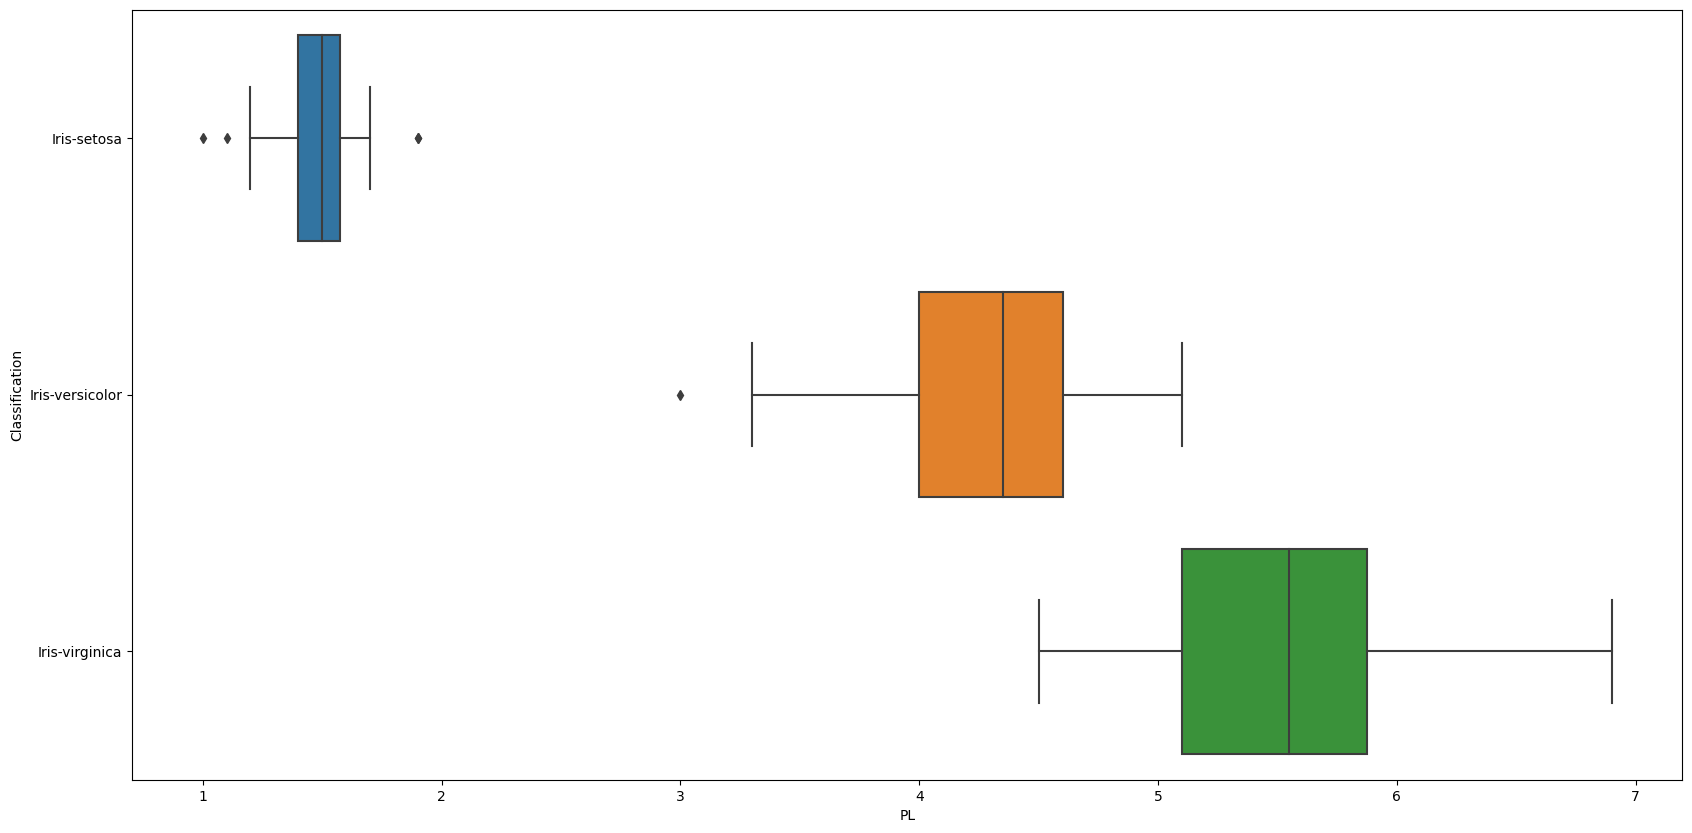

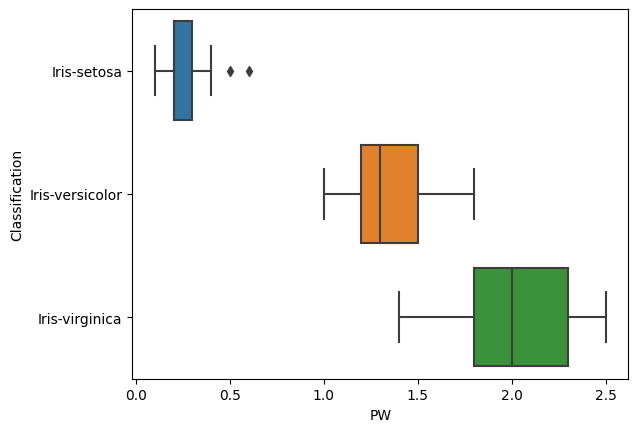

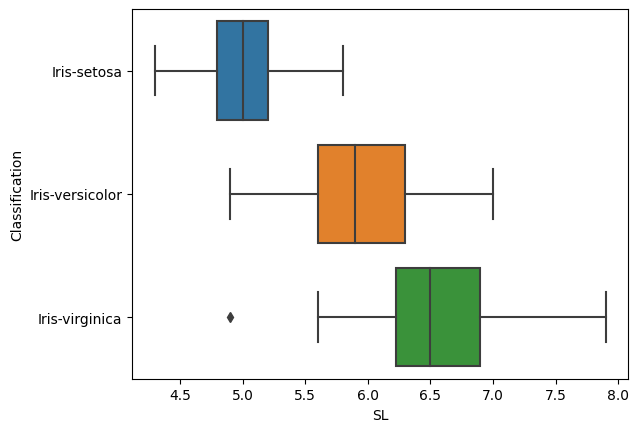

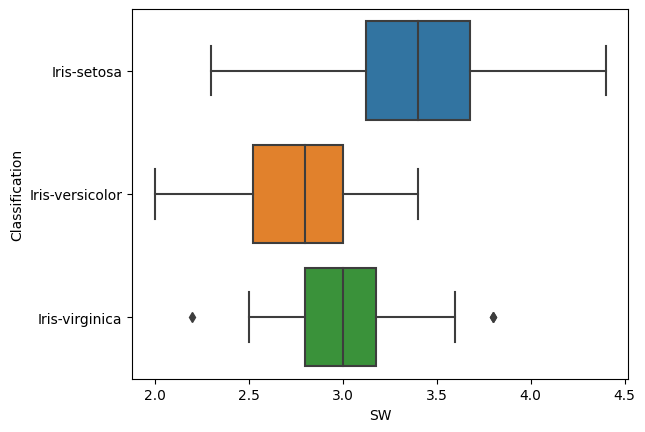

In [ ]:
plt.figure(figsize=(20,10))
for i in ['PL','PW','SL','SW']:
  sns.boxplot(data = iris_data,x = iris_data[i],y = iris_data['Classification'])
  plt.show()


Histograms

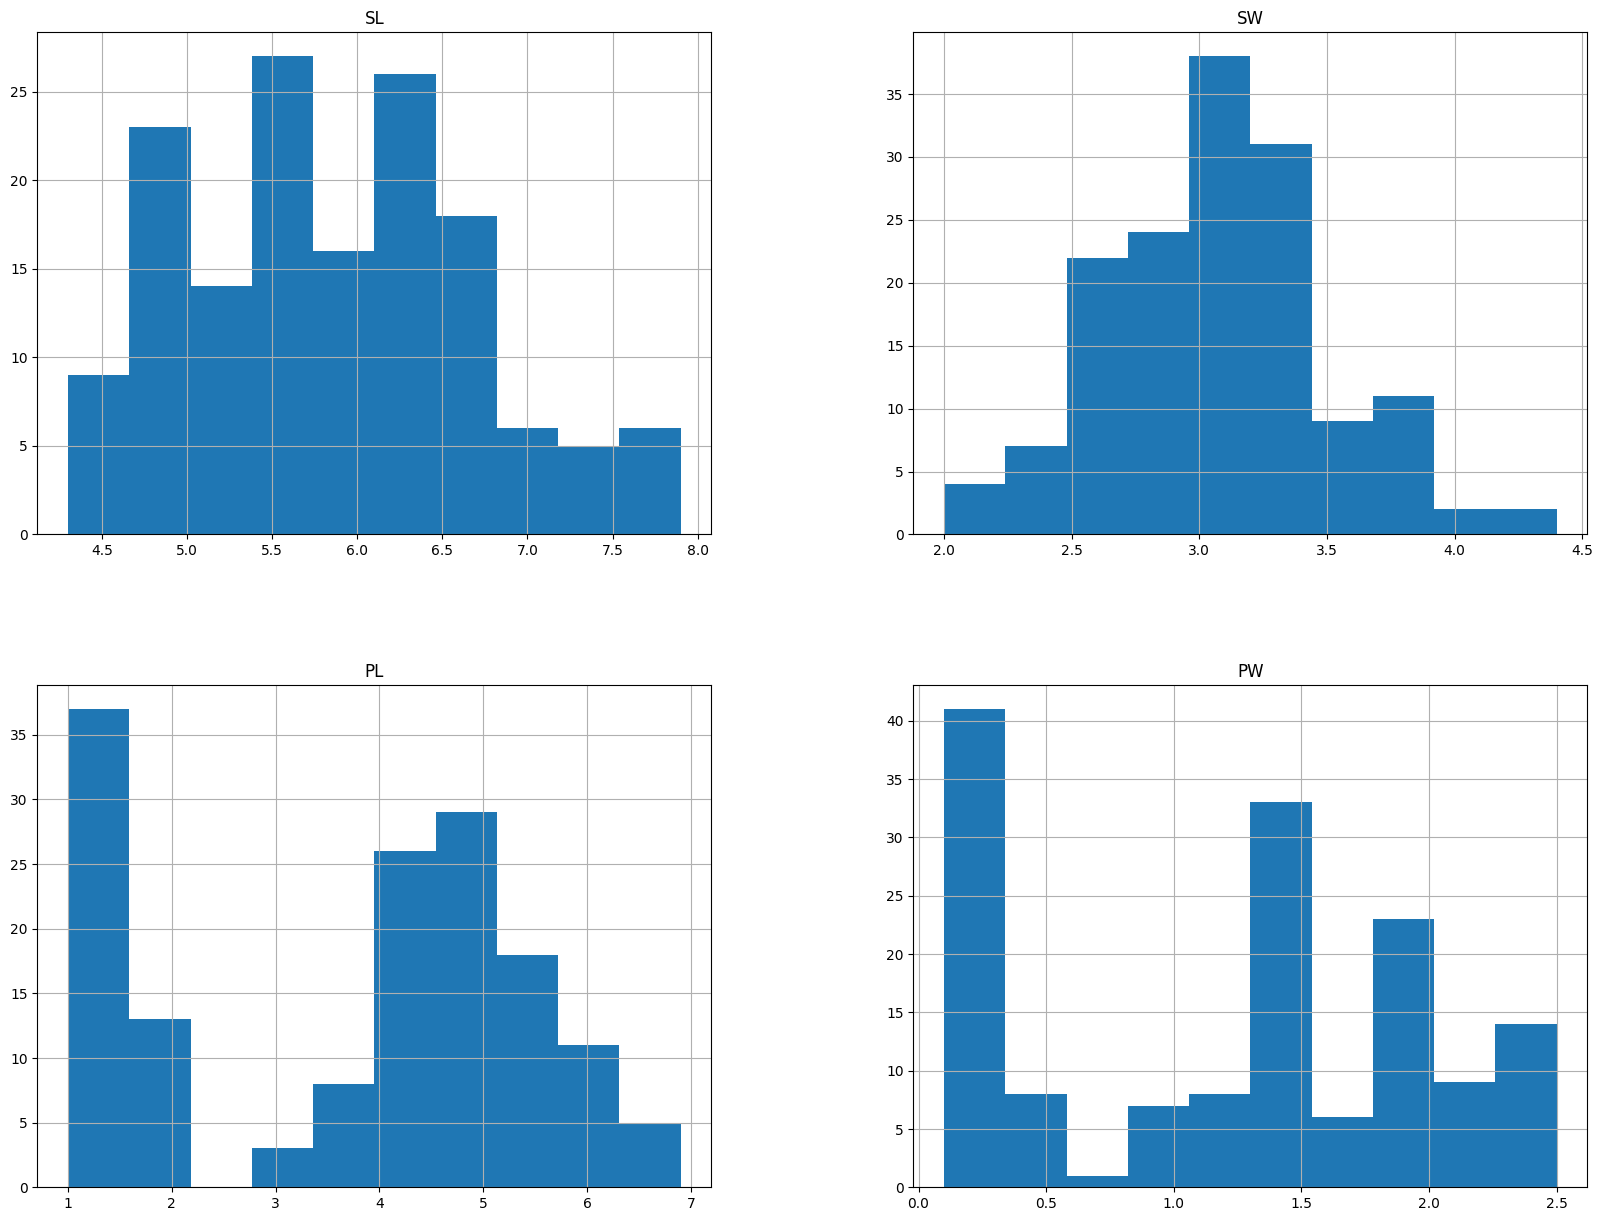

In [ ]:
iris_data.hist(figsize=(20,15))
plt.show()

**Encoding**

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
i#ris_data['Classification'] = le.fit_transform(iris_data['Classification'])
#iris_data['Classification'].unique()

array([0, 1, 2])

**CLASSIFICATION**


**1. Logistic Regression**

In [5]:
x = iris_data.drop(['Classification'],axis = 1)
y = iris_data['Classification']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model  = lr.fit(x_train,y_train)
lr_predictions = model.predict(x_test)


In [9]:
from sklearn.metrics import accuracy_score


**KNN**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [11]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
model.score(x_test, y_test)

1.0

**SVM**

In [13]:
from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear')
model = svm_class.fit(x_train,y_train)
svm_pred = model.predict(x_test)

**DECISION TREE**

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
model = dt_class.fit(x_train,y_train)
dt_pred = model.predict(x_test)

In [15]:
print('Logistic regression Accuracy : ',accuracy_score(y_test,lr_predictions))
print('SVM linear Accuracy : ',accuracy_score(y_test,svm_pred))
print('KNN Accuracy : ',model.score(x_test, y_test))
print('DT Accuracy : ', accuracy_score(y_test,dt_pred))

Logistic regression Accuracy :  1.0
SVM linear Accuracy :  1.0
KNN Accuracy :  1.0
DT Accuracy :  1.0


In [16]:
# save the model
import pickle
filename = 'savedmodel.pkl'
pickle.dump(model, open(filename, 'wb'))

In [17]:
load_model = pickle.load(open(filename,'rb'))

In [18]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)